In [1]:
import json
import sys
import hvplot.pandas
import pandas as pd
from utils import load_config, fetch_api_data, write_to_csv

In [2]:
#https://www.spc.noaa.gov/wcm/#data

In [3]:
#https://www.ncdc.noaa.gov/swdiws
# 'nx3tvs'       - (Point)   NEXRAD Level-3 Tornado Vortex Signatures
# 'nx3meso'      - (Point)   NEXRAD Level-3 Mesocyclone Signatures
# 'nx3hail'      - (Point)   NEXRAD Level-3 Hail Signatures
# 'nx3structure' - (Point)   NEXRAD Level-3 Storm Cell Structure Information
# 'warn'         - (Polygon) Severe Thunderstorm, Tornado, Flash Flood and Special Marine warnings
datasets = ["nx3tvs"]
outputFormat = "json"
daterange = "20240701:20240731"  # "periodOfRecord"

for dataset in datasets:
    base_url = f"https://www.ncdc.noaa.gov/swdiws/{outputFormat}/{dataset}/{daterange}"
    filename = f"swdiws_{dataset}.csv"

    data = fetch_api_data(base_url)
    #print(json.dumps(data, indent=2))
    #print(data)

    if data and "result" in data:
        write_to_csv(data["result"], filename, "w")
    else:
        print(f"No data found or invalid response format for dataset: {dataset}")


In [4]:
# 'nx3tvs'       - (Point)   NEXRAD Level-3 Tornado Vortex Signatures
# 'nx3meso'      - (Point)   NEXRAD Level-3 Mesocyclone Signatures
# 'nx3hail'      - (Point)   NEXRAD Level-3 Hail Signatures
# 'nx3structure' - (Point)   NEXRAD Level-3 Storm Cell Structure Information
# 'warn'         - (Polygon) Severe Thunderstorm, Tornado, Flash Flood and Special Marine warnings
datasets = ["nx3tvs"]
outputFormat = "geojson"
daterange = "20240701:20240731"  # "periodOfRecord"
numResults = 2500

# Initialize an empty list to store merged data
merged_data_list = []

for dataset in datasets:
    base_url = f"https://www.ncdc.noaa.gov/swdiws/{outputFormat}/{dataset}/{daterange}/{numResults}"
    filename = f"swdiws_{dataset}_{outputFormat}.csv"

    data = fetch_api_data(base_url)
    # Data is nested, retrieve "features" dictionary
    rows = data["features"]
    
    # Iterate over each record in rows as that is nested as well
    for record in rows:
       # Merge the 'properties' and 'geometry' dictionaries
        merged_data = {**record["properties"], **record["geometry"]}
        # Append the merged data to the list
        merged_data_list.append(merged_data)

    # Convert to DataFrame
    merged_df = pd.DataFrame(merged_data_list)

# Split the coordinates column into latitude and longitude
merged_df[['longitude', 'latitude']] = pd.DataFrame(merged_df['coordinates'].tolist(), index=merged_df.index)
# Drop the original coordinates column
merged_df = merged_df.drop(columns=['coordinates'])
merged_df.head(25)

    # if data and "features" in data:
    #     write_to_csv(data["features"], filename, "w")
    # else:
    #     print(f"No data found or invalid response format for dataset: {dataset}")

,CELL_TYPE,MAX_SHEAR,WSR_ID,MXDV,CELL_ID,ZTIME,AZIMUTH,RANGE,type,longitude,latitude
0,TVS,30,KIAD,76,X1,2024-07-01T00:03:15Z,135,40,Point,-76.9275,38.6106
1,TVS,41,KBWI,90,N4,2024-07-01T00:05:01Z,204,35,Point,-76.9325,38.5563
2,TVS,50,KDCA,78,R3,2024-07-01T00:07:32Z,102,25,Point,-76.4415,38.6711
3,TVS,37,KDEN,81,Q7,2024-07-01T00:11:04Z,118,35,Point,-103.8610,39.4510
4,TVS,44,KDEN,90,U4,2024-07-01T00:14:14Z,119,34,Point,-103.8861,39.4503
5,TVS,38,KDEN,87,U4,2024-07-01T00:17:04Z,119,36,Point,-103.8486,39.4339
6,TVS,32,KDEN,74,U4,2024-07-01T00:17:04Z,117,37,Point,-103.8166,39.4447
7,TVS,28,KIAD,78,W2,2024-07-01T00:18:05Z,132,44,Point,-76.8338,38.5908
8,TVS,28,KIAD,82,W2,2024-07-01T00:18:05Z,128,45,Point,-76.7748,38.6194
9,TVS,29,KIAD,80,E3,2024-07-01T00:39:15Z,117,44,Point,-76.6937,38.7478


In [5]:
# Convert 'MXDV' to numeric, forcing errors to NaN if conversion fails
merged_df['MXDV'] = pd.to_numeric(merged_df['MXDV'], errors='coerce')
# Ensure 'WSR_ID' is treated as a string
merged_df['WSR_ID'] = merged_df['WSR_ID'].astype(str)
merged_df.to_csv('swdiws_nx3tvs_geojson.csv', index=False)
print(merged_df.dtypes)

CELL_TYPE     object
MAX_SHEAR     object
WSR_ID        object
MXDV           int64
CELL_ID       object
ZTIME         object
AZIMUTH       object
RANGE         object
type          object
longitude    float64
latitude     float64
dtype: object


In [6]:
# https://www.fema.gov/about/openfema/data-sets
base_url = f"https://www.fema.gov/api/open/v2/"

params = {"$count": "true",
          "$filter": "incidentType eq 'Tornado'"}

endpoint = "DisasterDeclarationsSummaries"
filename = f"{endpoint}.csv"
endpoint_url = f"{base_url}{endpoint}"

data = fetch_api_data(endpoint_url, params)
#print(json.dumps(data, indent=2))
tornado_summary_df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
write_to_csv(data["DisasterDeclarationsSummaries"], filename, "w")

disaster_numbers = tornado_summary_df.disasterNumber.unique()
formatted_disaster_numbers = ', '.join(f'{num}' for num in disaster_numbers)
formatted_disaster_numbers

    #disasterNumber
#tornado_newer_df = tornado_df[tornado_df["declarationDate"] > "2019-12-31"]
#tornado_df.groupby(by="disasterNumber").count()


'4706, 4637, 4633, 4630, 4601, 4556, 4544, 4776, 4779, 4777, 4476, 4447, 4419, 4385, 4297, 4295, 4205, 4179, 4157, 4117, 4778, 3577, 3576, 3575, 4300, 3125, 3090, 3089, 3088, 3085, 3084, 3081, 3076, 3065, 3064, 3063, 3062, 3054, 3008, 3007, 3006, 1994, 1943, 1921, 1834, 1612, 1599, 1484, 1432, 1416, 1409, 1353, 1323, 1310, 1285, 1280, 1274, 1273, 1272, 1225, 1212, 1167, 1058, 1057, 1055, 1033, 1020, 987, 982, 980, 970, 969, 968, 967, 963, 959, 949, 939, 905, 903, 878, 848, 837, 833, 827, 819, 818, 817, 814, 806, 804, 802, 793, 772, 767, 763, 738, 737, 718, 716, 710, 704, 703, 700, 699, 660, 655, 625, 621, 620, 617, 608, 591, 590'

In [7]:
params = {"$count": "true",
          "$filter": f"disasterNumber in ({formatted_disaster_numbers})"}

endpoint = "HousingAssistanceOwners"
filename = f"{endpoint}.csv"
endpoint_url = f"{base_url}{endpoint}"
data = fetch_api_data(endpoint_url, params)
#print(json.dumps(data, indent=2))
housing_assistance_df = pd.DataFrame(data["HousingAssistanceOwners"])
write_to_csv(data["HousingAssistanceOwners"], filename, "w")
housing_assistance_df

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1484,OH,Carroll (County),BOWERSTON,44695,1,0.00,1,0.00,1,...,0,0.00,0.00,0.0,0.00,0,0,0,0,a7f32d9b-d710-4ba3-afb2-10a3f87cb5f3
1,1484,OH,Carroll (County),CARROLLTON,44615,6,949.53,5,5697.17,1,...,2,3376.37,1983.52,0.0,1392.85,2,0,0,0,7fdd7eb4-b494-4c6c-ae35-8739a4c6c2e2
2,1484,OH,Carroll (County),CLEVELAND,44120,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,ae7b12f9-73d8-44ba-8d8a-07a571319c41
3,1484,OH,Carroll (County),DELLROY,44620,2,2941.96,2,5883.91,0,...,2,4369.78,4149.35,0.0,220.43,2,0,0,0,7196a4b6-b1f9-421c-8ab5-c417b5f4b397
4,1484,OH,Carroll (County),MALVERN,44644,2,3441.74,2,6883.48,0,...,2,6338.50,6338.50,0.0,0.00,1,1,0,0,bf74c997-6c62-4b87-8e69-bd925ee20a2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4476,TN,Davidson (County),NASHVILLE,37211,7,0.00,3,0.00,3,...,0,0.00,0.00,0.0,0.00,0,0,0,0,eb106c84-0eff-4e70-a739-4378f99d6b36
996,4476,TN,Davidson (County),NASHVILLE,37212,2,0.00,2,0.00,2,...,0,0.00,0.00,0.0,0.00,0,0,0,0,534216dd-7bfb-444e-b8cf-e40fc1d521ea
997,4476,TN,Davidson (County),NASHVILLE,37213,2,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,b651eedb-b456-444b-b1a7-06afa5035800
998,4476,TN,Davidson (County),NASHVILLE,37214,190,675.09,24,128267.83,4,...,8,59144.16,34803.22,15004.0,9336.94,2,3,3,0,3b8f4b7a-7e7c-476f-b1d8-23009f8b5974


In [8]:
%%capture --no-display
# Configure the map plot
tornadoes_plot = merged_df.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles="OSM",
    frame_width=800,
    frame_height=600,
    size="MXDV",
    color="WSR_ID"
)

# Display the map
tornadoes_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (WSR_ID,MXDV)

In [9]:
### National Centers for Environmental Information ###

# Load config file
config = load_config('config.json')

# Get API key
weather_api_key = config.get('National Centers for Environmental Information', {}).get('key')

# Set base URL
base_url = f"https://www.ncei.noaa.gov/cdo-web/api/v2"

# Set endpoints
endpoints = ["datasets", "datacategories", "datatypes", "locationcategories", "locations", "stations", "data"]

# Check if key exists in config file 
if not weather_api_key:
    print("Weather API key not found in the configuration file.")
    sys.exit()
# Define headers
headers = {"token": weather_api_key}
# Define HTTPS call timeout (seconds)
timeout = 30

# Loop through each endpoint
for endpoint in endpoints:
    print(f"Running: {endpoint}")
    
    # Update params if the endpoint is 'data'
    if endpoint == "data":
        params = {"datasetid": "GHCND"}
        timeout = 60
    else:
        # Ensure 'datasetid' is not in params for other endpoints
        params = {"limit": 1000}

    # Define output filename
    filename = f"NCEI_{endpoint}.csv"
    
    # Set URL
    url_endpoint = f"{base_url}/{endpoint}"
    
    # Run a request using params and header dictionaries
    data = fetch_api_data(url_endpoint, params, headers, "GET", timeout)
    
    # Process and write the data to CSV
    if data and "results" in data:
        write_to_csv(data["results"], filename, "w")
    else:
        print(f"No data found or invalid response format for endpoint: {endpoint}")

Configuration file config.json not found.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [10]:
# API to convert coordinates to addresses
lat = "41.79445"
lng = "-72.89675"

params = {"format": "json",
          "lat": lat,
          "lon": lng}

headers = {"User-Agent": "MyCustomApp/1.0 (hef1125@hotmail.com)"}

endpoint = "reverse"

base_url = f"https://nominatim.openstreetmap.org/{endpoint}"


data = fetch_api_data(base_url, params, headers)
print(json.dumps(data, indent=2))

{
  "place_id": 11227963,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 9364954533,
  "lat": "41.7942813",
  "lon": "-72.8963836",
  "class": "place",
  "type": "house",
  "place_rank": 30,
  "importance": 9.99999999995449e-06,
  "addresstype": "place",
  "name": "",
  "display_name": "63, Northgate, Avon, Capitol Planning Region, 06001, United States",
  "address": {
    "house_number": "63",
    "road": "Northgate",
    "town": "Avon",
    "county": "Capitol Planning Region",
    "postcode": "06001",
    "country": "United States",
    "country_code": "us"
  },
  "boundingbox": [
    "41.7942313",
    "41.7943313",
    "-72.8964336",
    "-72.8963336"
  ]
}


# Visualization Coding

In [14]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

try:
    # Check if the DataFrame is not empty
    if merged_df.empty:
        print("The DataFrame is empty. No data to plot.")
    else:
        # Create a base map centered around the mean latitude and longitude
        base_map = folium.Map(location=[merged_df['latitude'].mean(), merged_df['longitude'].mean()], zoom_start=6)

        # Prepare data for the heatmap
        heat_data = [[row['latitude'], row['longitude']] for index, row in merged_df.iterrows()]

        # Add the heatmap to the base map
        HeatMap(heat_data).add_to(base_map)

        # Display the map inline
        display(base_map)
except Exception as e:
    print(f"An error occurred: {e}")


* This code generates an interactive heatmap using Folium to visualize the geographical distribution of tornado damage. Each point on the map represents tornado damage locations, with areas of higher damage intensity shown in warmer colors.

* Helps in identifying high-impact regions and understanding spatial patterns of tornado damage across the US. This visual representation is crucial for assessing which areas require more attention or resources.


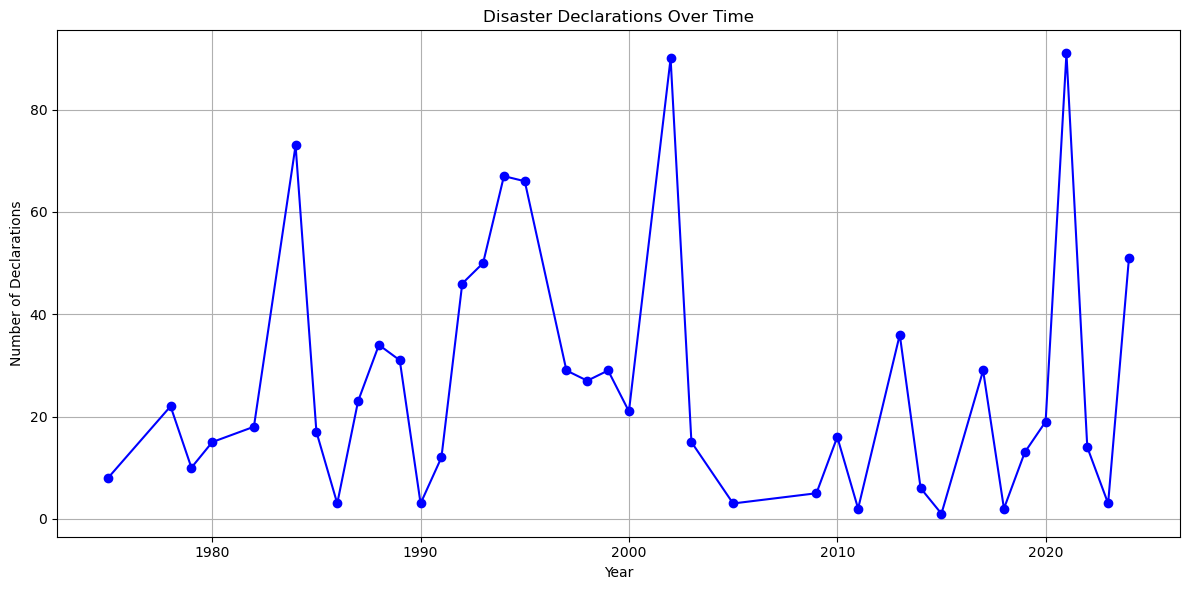

In [23]:
# Convert declarationDate to datetime
disaster_df['declarationDate'] = pd.to_datetime(disaster_df['declarationDate'])

# Group by year
yearly_declarations = disaster_df.groupby(disaster_df['declarationDate'].dt.year).size()

# Plot
plt.figure(figsize=(12, 6))
yearly_declarations.plot(kind='line', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Declarations')
plt.title('Disaster Declarations Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()



* This line plot shows the trend of disaster declarations over the years. By grouping the data by year, it visualizes how the frequency of disaster declarations has changed over time.

* Benefit: Useful for identifying trends or patterns in disaster declarations, such as whether certain years had more frequent or severe events. This information can be valuable for analyzing changes in disaster frequency and planning future responses.

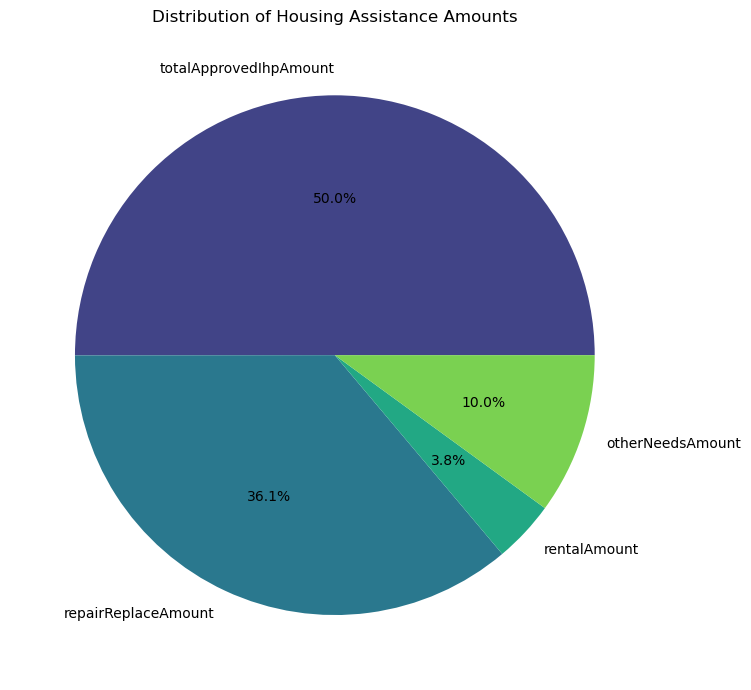

In [27]:
# Aggregate distribution of assistance amounts
assistance_distribution = housing_df[['totalApprovedIhpAmount', 'repairReplaceAmount', 'rentalAmount', 'otherNeedsAmount']].sum()

# Plot
plt.figure(figsize=(10, 7))
assistance_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(assistance_distribution)))
plt.ylabel('')
plt.title('Distribution of Housing Assistance Amounts')
plt.tight_layout()
plt.show()


* This pie chart illustrates the distribution of various types of housing assistance amounts provided. It shows the proportion of total approved assistance, repair and replace amounts, rental amounts, and other needs amounts.

* Benefit: Provides a clear picture of how housing assistance is allocated among different categories. This helps in understanding which types of assistance are most prevalent and can guide resource allocation and policy-making.

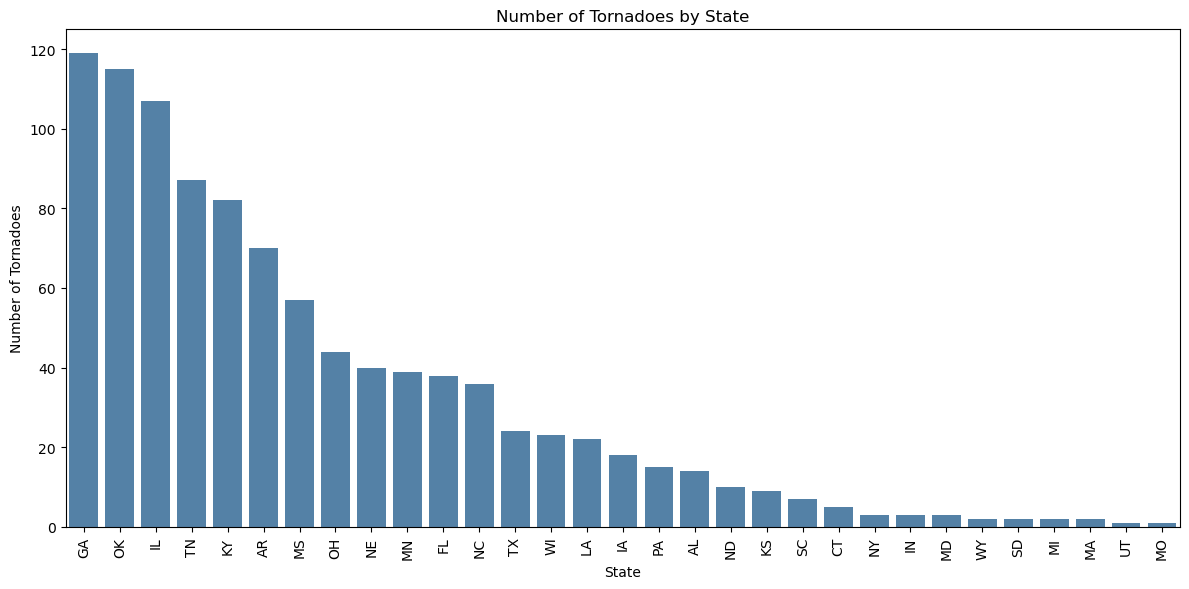

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DisasterDeclarationsSummaries CSV
disaster_df = pd.read_csv("DisasterDeclarationsSummaries.csv")

# Filter for tornadoes in the US
tornado_df = disaster_df[disaster_df['incidentType'] == 'Tornado']

# Aggregate data by state
state_damage = tornado_df.groupby('state').size().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=state_damage.index, y=state_damage.values, color='steelblue')  # Removed palette, added color
plt.title('Number of Tornadoes by State')
plt.xlabel('State')
plt.ylabel('Number of Tornadoes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



* This bar chart shows the number of tornadoes that occurred in each state. The states are sorted by the number of tornadoes, providing a clear comparison of tornado frequency across the US.

* Helps to identify which states are most affected by tornadoes. This information is crucial for assessing tornado impact and prioritizing emergency preparedness and response efforts.



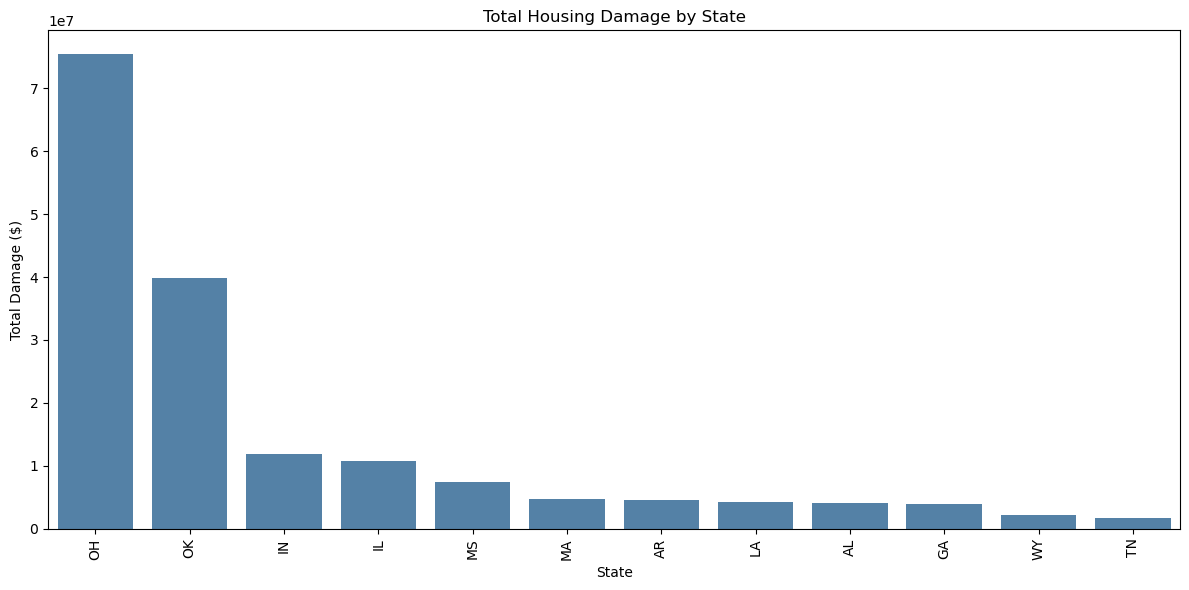

In [30]:
# Load the HousingAssistanceOwners CSV
housing_df = pd.read_csv("HousingAssistanceOwners.csv")

# Aggregate damage data by state
state_damage = housing_df.groupby('state')['totalDamage'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=state_damage.index, y=state_damage.values, color='steelblue')  # Removed palette, added color
plt.title('Total Housing Damage by State')
plt.xlabel('State')
plt.ylabel('Total Damage ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


* This bar chart displays the total housing damage reported by state. It aggregates the damage data and visualizes it to show which states experienced the most severe housing damage.

* Provides insights into the distribution of housing damage across states, highlighting areas with the highest financial impacts. This can inform recovery efforts and help allocate resources more effectively.

# Analysis of Disaster Declarations and Housing Assistance

## 1. What trends are evident in the number of disaster declarations over time?

**Answer**:
The line chart reveals that there were peaks in the number of disaster declarations in the years 1985, 1995, 2002, and 2021. Conversely, the years 1980, 1990, and 2005 saw the lowest number of declarations.

**Analysis**:
The peaks in disaster declarations could indicate periods of increased disaster activity or better data reporting and awareness. The years with lower numbers might reflect fewer significant disasters or less comprehensive data collection during those times. This trend analysis helps identify periods of increased disaster activity and evaluate how reporting practices or disaster frequency have changed over time.

## 2. How are housing assistance funds distributed across different types of aid?

**Answer**:
The pie chart shows that 50% of housing assistance funds are allocated to the Total Approved IHP Amount, while 36% are directed towards Repair/Replace Amounts.

**Analysis**:
The distribution indicates that a significant portion of funds is used for comprehensive housing assistance (Total Approved IHP Amount), suggesting a focus on broad support measures. The Repair/Replace Amount also represents a substantial portion, highlighting the importance of repairing and replacing damaged properties. This distribution helps understand the priorities in housing assistance and how financial resources are allocated to support affected individuals.

## 3. Which states experience the highest number of tornadoes?

**Answer**:
The bar chart indicates that the states with the highest number of tornadoes are Georgia (GA), Oklahoma (OK), Illinois (IL), Tennessee (TN), Kentucky (KY), Arkansas (AR), and Mississippi (MS).

**Analysis**:
These states are located in regions known for high tornado activity, such as the "Tornado Alley" in the central U.S. The data reflects their susceptibility to tornadoes, which can be attributed to their geographic location and climatic conditions. Identifying these states helps in understanding tornado-prone areas and allocating resources for tornado preparedness and response.

## 4. Which states report the highest total housing damage?

**Answer**:
The bar chart shows that Ohio (OH) and Oklahoma (OK) report the highest total housing damage.

**Analysis**:
The significant damage reported in these states suggests either frequent or severe disaster events in these regions. Ohio and Oklahoma could have experienced major disasters or a high frequency of impactful events, leading to substantial housing damage. Understanding these areas with high damage levels helps target relief efforts and improve disaster response strategies.

## Summary

1. **Disaster Declarations**: The fluctuations in the number of disaster declarations over time show periods of increased activity or better reporting. This helps in analyzing disaster trends and improving response mechanisms.
2. **Housing Assistance**: The distribution of housing assistance funds highlights priorities in aid allocation, focusing on comprehensive support and repairs. This helps in understanding how financial resources are used to assist disaster-affected individuals.
3. **Tornado Activity**: The identification of states with the highest tornado occurrences provides insights into tornado-prone regions, aiding in preparedness and resource allocation.
4. **Housing Damage**: The analysis of total housing damage by state identifies areas with significant impacts, guiding targeted relief efforts and disaster management strategies.
esponse strategies.
ts and disaster management strategies.
ter management strategies.
